In [9]:
import pickle

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [10]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [11]:
result1 = pickle.load(open("1.pickle", 'rb'))
result2 = pickle.load(open("2.pickle", 'rb'))
result3 = pickle.load(open("3.pickle", 'rb'))
result4 = pickle.load(open("4.pickle", 'rb'))
result5 = pickle.load(open("5.pickle", 'rb'))
result6 = pickle.load(open("6.pickle", 'rb'))
result7 = pickle.load(open("7.pickle", 'rb'))
result8 = pickle.load(open("8.pickle", 'rb'))
result9 = pickle.load(open("9.pickle", 'rb'))
result10 = pickle.load(open("10.pickle", 'rb'))

In [12]:
result_pp = pd.concat([result1, result2], axis=0, ignore_index=True)
result_pp = pd.concat([result_pp, result3], axis=0, ignore_index=True)
result_pp = pd.concat([result_pp, result4], axis=0, ignore_index=True)
result_pp = pd.concat([result_pp, result5], axis=0, ignore_index=True)

result_iwasa = pd.concat([result6, result7], axis=0, ignore_index=True)
result_iwasa = pd.concat([result_iwasa, result8], axis=0, ignore_index=True)
result_iwasa = pd.concat([result_iwasa, result9], axis=0, ignore_index=True)
result_iwasa = pd.concat([result_iwasa, result10], axis=0, ignore_index=True)

In [13]:
res_sort_pp = result_pp.sort_values(by='r', ascending=True).values
res_sort_iwasa = result_iwasa.sort_values(by='r', ascending=True).values

In [14]:
_iter = 5
res_pp = []
res2_pp = []
res_iwasa = []
res2_iwasa = []

In [15]:
r_dr_err = np.zeros((1001, 3))
r_dr_in = np.zeros((1, 2))
r_dr_err[:, :] = np.nan
r_dr_in[:, :] = np.nan

for i in tqdm(range(0, 1001, _iter)):
    res_sort_l = res_sort_pp[np.where(res_sort_pp[:, 6] >= i/1000)]
    res_sort_lr = res_sort_l[np.where(res_sort_l[:, 6] < (i+_iter)/1000)]
    columns = ['x', 'y', 'dx', 'dy', 'p0', 'p1', 'r', 'theta', 'dr']
    df = pd.DataFrame(data=res_sort_lr, columns=columns, dtype='float')
    q1 = df['dr'].quantile(0.25)
    q2 = df['dr'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['dr'] >= bottom) & (df['dr'] <= upper)].values
    tmp = np.array([_in[:, 6], _in[:, 8]]).T
    r_dr_in = np.vstack([r_dr_in, tmp])

    r_dr_err[i, 0] = i
    r_dr_err[i, 1] = np.mean(tmp, axis=0)[1]
    r_dr_err[i, 2] = np.std(tmp, axis=0)[1]

r_dr_err = r_dr_err[::_iter]
res_pp = r_dr_err
res2_pp = r_dr_in

100%|██████████| 201/201 [00:00<00:00, 229.51it/s]


In [16]:
r_dr_err = np.zeros((1001, 3))
r_dr_in = np.zeros((1, 2))
r_dr_err[:, :] = np.nan
r_dr_in[:, :] = np.nan

for i in tqdm(range(0, 1001, _iter)):
    res_sort_l = res_sort_iwasa[np.where(res_sort_iwasa[:, 6] >= i/1000)]
    res_sort_lr = res_sort_l[np.where(res_sort_l[:, 6] < (i+_iter)/1000)]
    columns = ['x', 'y', 'dx', 'dy', 'p0', 'p1', 'r', 'theta', 'dr']
    df = pd.DataFrame(data=res_sort_lr, columns=columns, dtype='float')
    q1 = df['dr'].quantile(0.25)
    q2 = df['dr'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['dr'] >= bottom) & (df['dr'] <= upper)].values
    tmp = np.array([_in[:, 6], _in[:, 8]]).T
    r_dr_in = np.vstack([r_dr_in, tmp])

    r_dr_err[i, 0] = i
    r_dr_err[i, 1] = np.mean(tmp, axis=0)[1]
    r_dr_err[i, 2] = np.std(tmp, axis=0)[1]

r_dr_err = r_dr_err[::_iter]
res_iwasa = r_dr_err
res2_iwasa = r_dr_in

100%|██████████| 201/201 [00:00<00:00, 284.39it/s]


In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.5)
plt.ylim(0.03, 0.5)
ax.set_yscale("log")
ax.scatter(res_pp[80:-18, 0]/1000, res_pp[80:-18, 1])
plt.show()

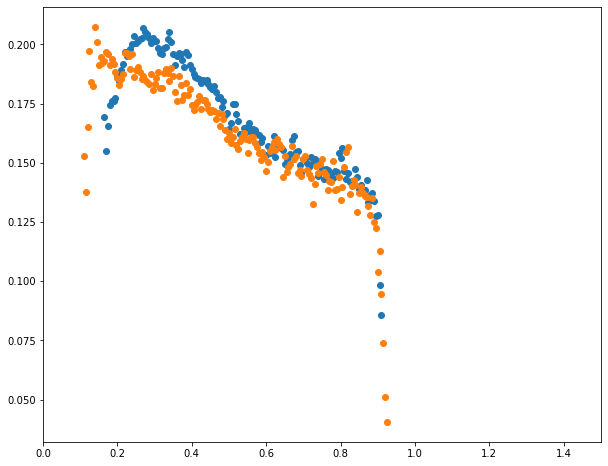

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.5)
ax.scatter(res_pp[:, 0]/1000, res_pp[:, 1])
ax.scatter(res_iwasa[:, 0]/1000, res_iwasa[:, 1])
plt.show()

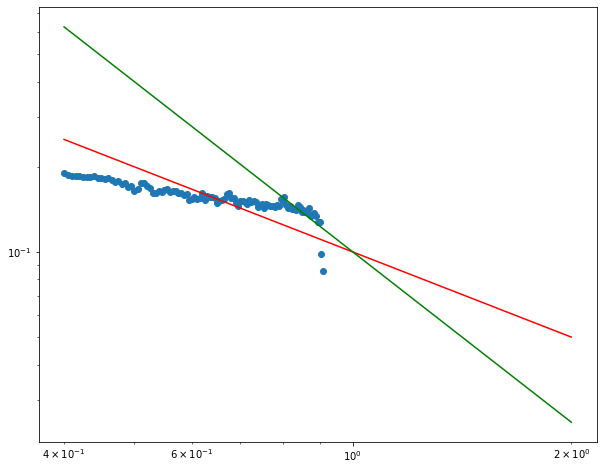

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(res_pp[80:, 0]/1000, res_pp[80:, 1])
ax.plot(np.linspace(0.4, 2, 100), 1 / np.linspace(0.4, 2, 100) * 0.1, c='r')
ax.plot(np.linspace(0.4, 2, 100), 1 / np.linspace(0.4, 2, 100)**2 * 0.1, c='g')
plt.show()